<a href="https://colab.research.google.com/github/achu-narayan-s/Internship/blob/main/practice_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Read the CSV file into a DataFrame
url = "https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv"
data = pd.read_csv(url)

# Convert the 'Sex' column to numerical using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Sex'])

# Select the features and target variable
X = data_encoded.drop('Rings', axis=1)  # Input features (all columns except 'rings')
y = data_encoded['Rings'] > 7           # Target variable (True if rings > 7, False otherwise)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
model = SVC()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9055023923444976


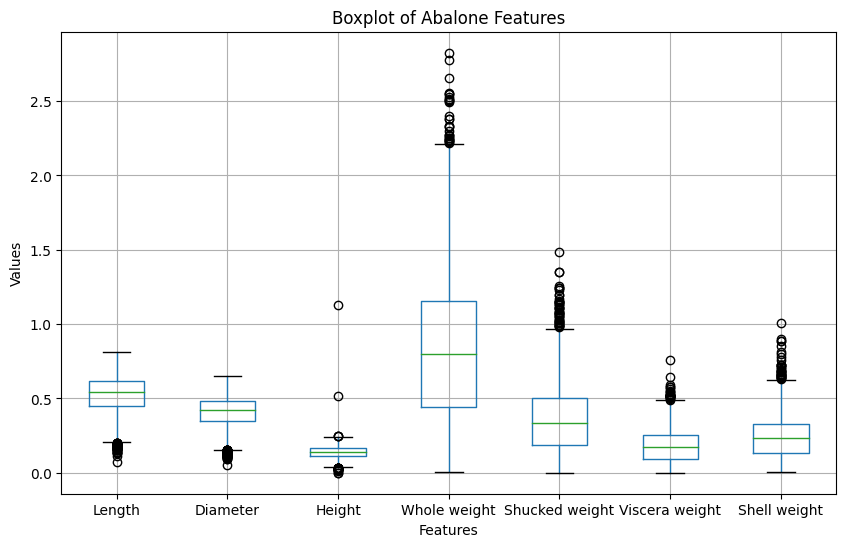

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
url = "https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv"
data = pd.read_csv(url)

# Select the features to include in the boxplot
features = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']

# Create a boxplot for each feature
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
data[features].boxplot()

# Set the title and labels
plt.title('Boxplot of Abalone Features')
plt.xlabel('Features')
plt.ylabel('Values')

# Show the plot
plt.show()

In [6]:
import pandas as pd

# Read the CSV file into a DataFrame
url = "https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv"
data = pd.read_csv(url)

# Display the DataFrame
print(data)

     Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3      

In [8]:
import pandas as pd
from scipy.stats import chi2_contingency

# Read the CSV file into a DataFrame
url = "https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv"
data = pd.read_csv(url)

# Select the categorical variables for the chi-square test
categorical_vars = ['Sex', 'Rings']

# Create a contingency table
contingency_table = pd.crosstab(data[categorical_vars[0]], data[categorical_vars[1]])

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)

Chi-square statistic: 1316.07973176115
P-value: 8.004519071049616e-240
Degrees of freedom: 54


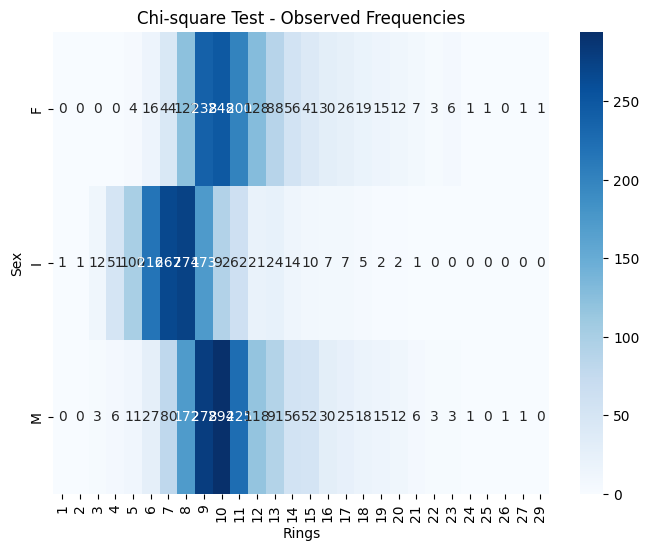

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Read the CSV file into a DataFrame
url = "https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv"
data = pd.read_csv(url)

# Select the categorical variables for the chi-square test
categorical_vars = ['Sex', 'Rings']

# Create a contingency table
contingency_table = pd.crosstab(data[categorical_vars[0]], data[categorical_vars[1]])

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Create a heatmap of the observed and expected frequencies
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="Blues")
plt.title("Chi-square Test - Observed Frequencies")
plt.xlabel(categorical_vars[1])
plt.ylabel(categorical_vars[0])
plt.show()

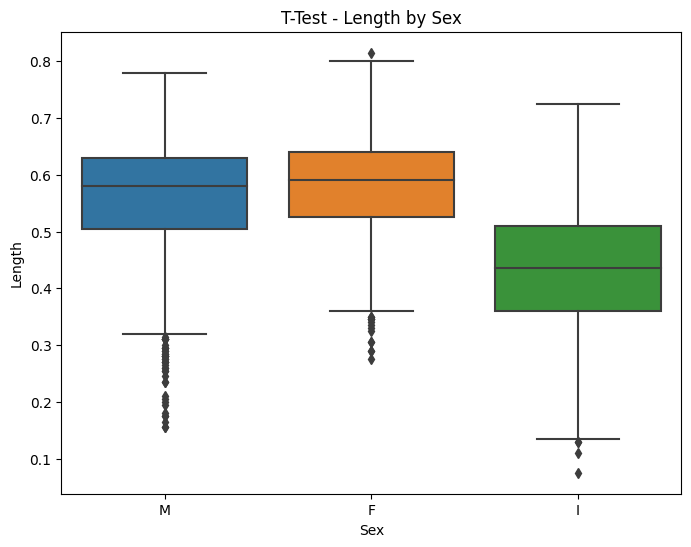

T-Statistic: -4.923512005809771
P-Value: 8.987874966212848e-07


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Read the CSV file into a DataFrame
url = "https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv"
data = pd.read_csv(url)

# Select the variables for the t-test
variable = 'Length'
group_variable = 'Sex'

# Perform the t-test
group1 = data[data[group_variable] == 'M'][variable]
group2 = data[data[group_variable] == 'F'][variable]
t_statistic, p_value = ttest_ind(group1, group2)

# Create a box plot to visualize the comparison
plt.figure(figsize=(8, 6))
sns.boxplot(x=group_variable, y=variable, data=data)
plt.title("T-Test - {} by {}".format(variable, group_variable))
plt.xlabel(group_variable)
plt.ylabel(variable)
plt.show()

# Print the t-test results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Read the CSV file into a DataFrame
url = "https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv"
data = pd.read_csv(url)

# Select the features and target variable
X = data.drop('Sex', axis=1)  # Input features (all columns except 'Class')
y = data['Sex']               # Target variable ('Class')

# Convert the categorical variable to numerical using one-hot encoding
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
model = DecisionTreeClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.49521531100478466


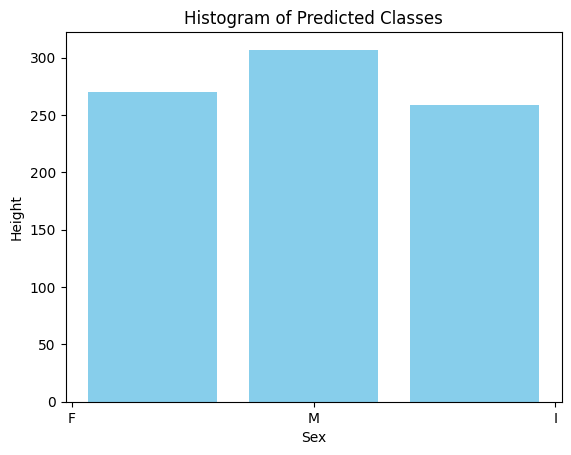

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Read the CSV file into a DataFrame
url = "https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv"
data = pd.read_csv(url)

# Select the features and target variable
X = data.drop('Sex', axis=1)  # Input features (all columns except 'Class')
y = data['Sex']               # Target variable ('Class')

# Convert the categorical variable to numerical using one-hot encoding
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
model = DecisionTreeClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

# Perform predictions on the test data
y_pred = model.predict(X_test)

# Create a histogram plot of the predicted classes
plt.hist(y_pred, bins=len(set(y)), align='mid', rwidth=0.8, color='skyblue')

# Set plot labels and title
plt.xlabel('Sex')
plt.ylabel('Height')
plt.title('Histogram of Predicted Classes')

# Show the plot
plt.show()

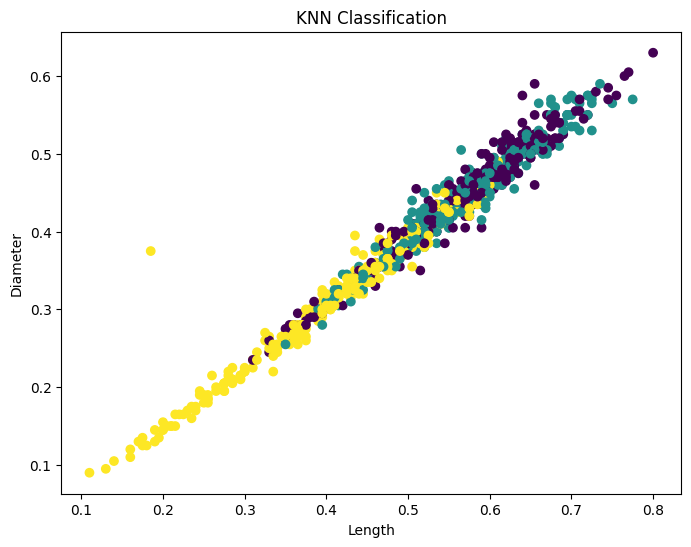

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Read the CSV file into a DataFrame
url = "https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv"
data = pd.read_csv(url)

# Select the features and target variable
X = data.drop('Sex', axis=1)  # Input features (all columns except 'Class')
y = data['Sex']               # Target variable ('Class')

# Convert the categorical variable to numerical using one-hot encoding
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a KNN classifier
model = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Create a scatter plot of the predicted classes
plt.figure(figsize=(8, 6))
plt.scatter(X_test['Length'], X_test['Diameter'], c=pd.factorize(y_pred)[0], cmap='viridis')
plt.title('KNN Classification')
plt.xlabel('Length')
plt.ylabel('Diameter')
plt.show()

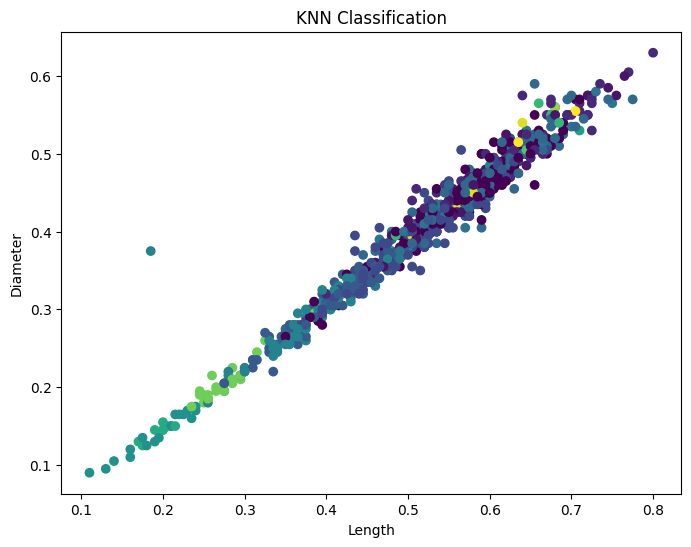

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Read the CSV file into a DataFrame
url = "https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv"
data = pd.read_csv(url)

# Select the features and target variable
X = data.drop('Rings', axis=1)  # Input features (all columns except 'Class')
y = data['Rings']               # Target variable ('Class')

# Convert the categorical variable to numerical using one-hot encoding
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a KNN classifier
model = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Create a scatter plot of the predicted classes
plt.figure(figsize=(8, 6))
plt.scatter(X_test['Length'], X_test['Diameter'], c=pd.factorize(y_pred)[0], cmap='viridis')
plt.title('KNN Classification')
plt.xlabel('Length')
plt.ylabel('Diameter')
plt.show()

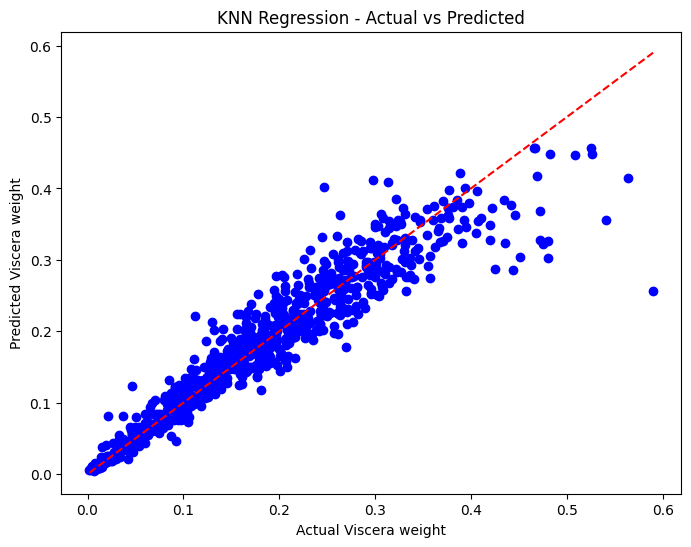

Mean Squared Error: 0.0012251368540669855


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Read the CSV file into a DataFrame
url = "https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv"
data = pd.read_csv(url)

# Select the features and target variable
X = data.drop('Viscera weight', axis=1)  # Input features (all columns except 'Viscera weight')
y = data['Viscera weight']               # Target variable ('Viscera weight')

# Convert the categorical variable to numerical using one-hot encoding
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a KNN regressor
model = KNeighborsRegressor(n_neighbors=5)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Create a scatter plot of the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('KNN Regression - Actual vs Predicted')
plt.xlabel('Actual Viscera weight')
plt.ylabel('Predicted Viscera weight')
plt.show()

# Print the mean squared error (MSE)
print("Mean Squared Error:", mse)

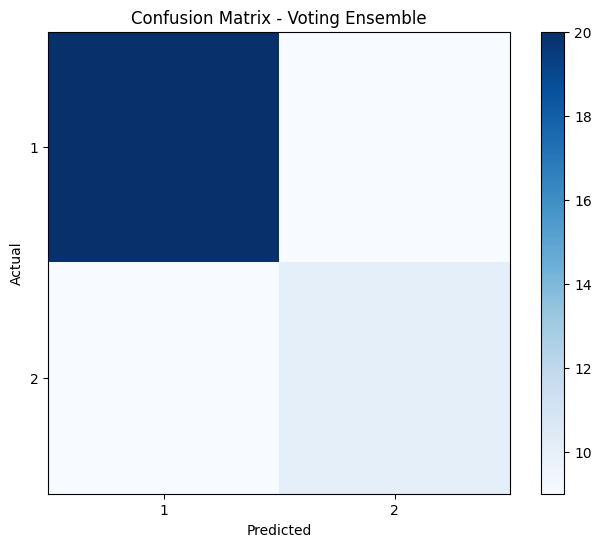

Accuracy: 0.625


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Read the CSV file into a DataFrame
url = "https://raw.githubusercontent.com/dsrscientist/dataset1/master/headbrain.csv"
data = pd.read_csv(url)

# Select the features and target variable
X = data.drop('Gender', axis=1)  # Input features (all columns except 'Gender')
y = data['Gender']               # Target variable ('Gender')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the individual classifiers
decision_tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svm = SVC()

# Create the Voting Classifier ensemble
ensemble = VotingClassifier(
    estimators=[('dt', decision_tree), ('knn', knn), ('svm', svm)],
    voting='hard'
)

# Fit the ensemble to the training data
ensemble.fit(X_train, y_train)

# Predict on the test data
y_pred = ensemble.predict(X_test)

# Calculate the accuracy of the ensemble
accuracy = accuracy_score(y_test, y_pred)

# Create a confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix - Voting Ensemble')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=np.arange(len(confusion_matrix.columns)), labels=confusion_matrix.columns)
plt.yticks(ticks=np.arange(len(confusion_matrix.index)), labels=confusion_matrix.index)
plt.imshow(confusion_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.show()

# Print the accuracy
print("Accuracy:", accuracy)

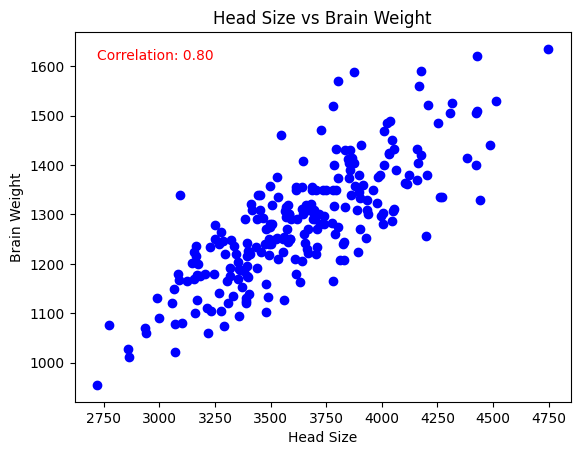

Correlation Coefficient: 0.7995697092542962


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
url = "https://raw.githubusercontent.com/dsrscientist/dataset1/master/headbrain.csv"
data = pd.read_csv(url)

# Calculate the correlation coefficient
correlation_coefficient = data['HeadSize'].corr(data['BrainWeight'])

# Create a scatter plot
plt.scatter(data['HeadSize'], data['BrainWeight'], color='blue')
plt.title('Head Size vs Brain Weight')
plt.xlabel('Head Size')
plt.ylabel('Brain Weight')

# Add correlation coefficient to the plot
plt.text(data['HeadSize'].min(), data['BrainWeight'].max(), f"Correlation: {correlation_coefficient:.2f}",
         horizontalalignment='left', verticalalignment='top', color='red')

# Display the plot
plt.show()

# Print the correlation coefficient
print("Correlation Coefficient:", correlation_coefficient)

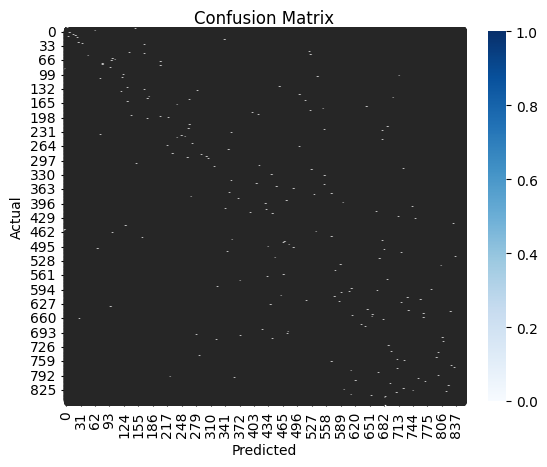

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
url = "https://raw.githubusercontent.com/dsrscientist/dataset4/main/Japan_used_cars_datasets.csv"
data = pd.read_csv(url)

# Preprocess the data
X = data.drop("id", axis=1)  # Input features (all columns except "Price")
y = data["id"]               # Target variable ("Price")

# Identify categorical columns for one-hot encoding
categorical_cols = X.select_dtypes(include=['object']).columns

# Create a column transformer for one-hot encoding
preprocessor = ColumnTransformer([('encoder', OneHotEncoder(handle_unknown='ignore'), categorical_cols)], remainder='passthrough')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data using one-hot encoding
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Create a Decision Tree Classifier
model = DecisionTreeClassifier()

# Fit the model to the training data
model.fit(X_train_encoded, y_train)

# Predict on the test data
y_pred = model.predict(X_test_encoded)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Add labels and title to the plot
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Show the plot
plt.show()